In [194]:
#pip install pandas numpy matplotlib seaborn tensorflow scikit-learn

In [195]:
#Imports & Environment Check
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [196]:
# =========================
# Load Market Trend Dataset
# =========================

train_df = pd.read_csv("../../data/training_data.csv")
test_df  = pd.read_csv("../../data/test_data.csv")

print("Training shape:", train_df.shape)
print("Test shape:", test_df.shape)

# =========================
# Convert Date column to datetime & extract time features
# =========================
for df in [train_df, test_df]:
    df["Date"] = pd.to_datetime(df["Date"])
    df["Year"]  = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month
    df["Day"]   = df["Date"].dt.day
    df.drop(columns=["Date"], inplace=True)

train_df.head()


Training shape: (24000, 15)
Test shape: (6000, 15)


,Open_Price,Close_Price,High_Price,Low_Price,Volume,Daily_Return_Pct,Volatility_Range,VIX_Close,Economic_News_Flag,Sentiment_Score,Federal_Rate_Change_Flag,GeoPolitical_Risk_Score,Currency_Index,Close_Price_Normalized,Year,Month,Day
0,46.14,44.01,46.60,42.82,12834123,-4.6164,3.78,22.47,1,-0.544,1,8.71,92.11,0.331842,1986,1,23
1,79.41,79.52,80.64,78.10,3822946,0.1385,2.54,39.96,0,-0.332,0,55.43,97.66,0.605817,1903,8,25
2,37.88,37.11,38.25,37.07,5306690,-2.0327,1.18,44.40,0,0.962,1,44.54,82.79,0.278605,1990,8,14
3,60.87,61.44,61.55,59.28,15075128,0.9364,2.27,34.51,0,0.677,0,7.85,80.36,0.466322,1905,1,19
4,8.11,7.93,8.47,7.60,13982675,-2.2195,0.87,34.29,0,-0.296,0,67.17,107.15,0.053468,1968,3,11


In [197]:
# =========================
# Define target & features
# =========================

TARGET = "Close_Price"

# Date already removed earlier
DROP_COLS = []

X_train = train_df.drop(columns=DROP_COLS + [TARGET])
y_train = train_df[TARGET]

X_test  = test_df.drop(columns=DROP_COLS + [TARGET])
y_test  = test_df[TARGET]


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)



X_train shape: (24000, 16)
y_train shape: (24000,)


In [198]:
from sklearn.preprocessing import StandardScaler

# Scale BOTH features and target
x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled  = x_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled  = y_scaler.transform(y_test.values.reshape(-1,1))


In [199]:
# =========================
# Build ANN Model
# =========================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

INPUT_DIM = X_train.shape[1]

model = Sequential([
    Dense(256, activation='relu',
          kernel_regularizer=l2(0.0005),
          input_shape=(INPUT_DIM,)),
    BatchNormalization(),
    Dropout(0.35),

    Dense(128, activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.0007),
    loss='mse',
    metrics=['mae']
)

model.summary()




Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 256)               4352      
                                                                 
 batch_normalization_18 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_41 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_19 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_19 (Dropout)        (None, 128)             

Epoch 1/200
750/750 [==============================] - 3s 3ms/step - loss: 0.3365 - mae: 0.3654 - val_loss: 0.1211 - val_mae: 0.1163 - lr: 7.0000e-04
Epoch 2/200
750/750 [==============================] - 2s 2ms/step - loss: 0.1804 - mae: 0.2295 - val_loss: 0.0998 - val_mae: 0.0737 - lr: 7.0000e-04
Epoch 3/200
750/750 [==============================] - 2s 2ms/step - loss: 0.1473 - mae: 0.1962 - val_loss: 0.0900 - val_mae: 0.0888 - lr: 7.0000e-04
Epoch 4/200
750/750 [==============================] - 2s 2ms/step - loss: 0.1228 - mae: 0.1789 - val_loss: 0.0695 - val_mae: 0.0644 - lr: 7.0000e-04
Epoch 5/200
750/750 [==============================] - 2s 3ms/step - loss: 0.0989 - mae: 0.1617 - val_loss: 0.0522 - val_mae: 0.0564 - lr: 7.0000e-04
Epoch 6/200
750/750 [==============================] - 2s 3ms/step - loss: 0.0799 - mae: 0.1526 - val_loss: 0.0433 - val_mae: 0.0772 - lr: 7.0000e-04
Epoch 7/200
750/750 [==============================] - 2s 3ms/step - loss: 0.0630 - mae: 0.1427 - va

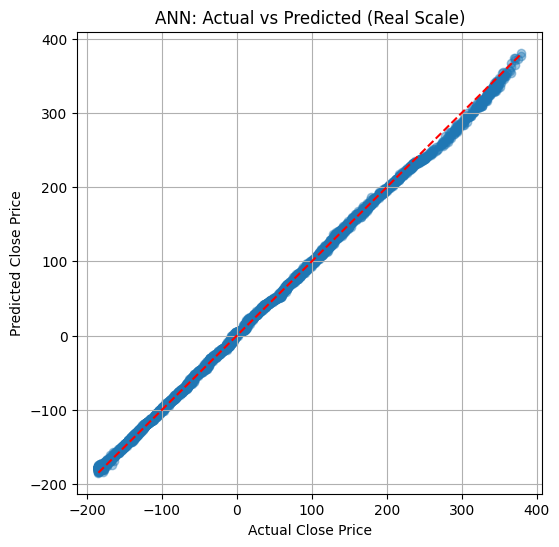

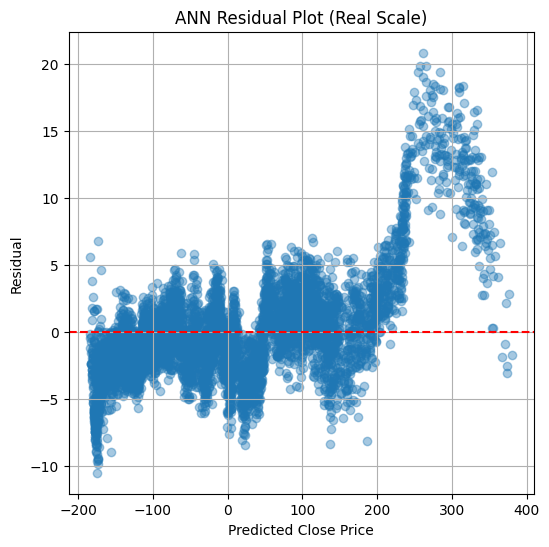

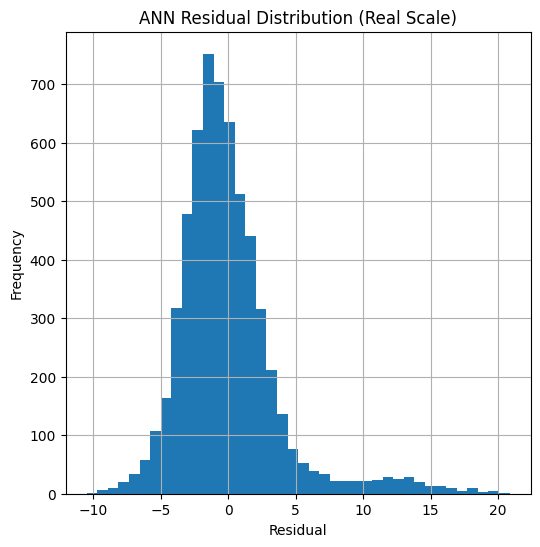

In [200]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Callbacks
# =========================
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=15,
    restore_best_weights=True
)

lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=7,
    min_lr=1e-5,
    verbose=1
)

# =========================
# Train Model
# =========================
history = model.fit(
    X_train_scaled,
    y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

# =========================
# Predictions (normalized scale)
# =========================
y_pred = model.predict(X_test_scaled).flatten()
y_test_scaled = np.asarray(y_test_scaled).flatten()

# =========================
# Metrics (normalized scale)
# =========================
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred))
r2   = r2_score(y_test_scaled, y_pred)

print(f"ANN RMSE (normalized): {rmse:.6f}")
print(f"ANN R² (normalized): {r2:.6f}")

# =========================
# De-normalize for plotting (REAL SCALE)
# =========================
price_min = train_df["Close_Price"].min()
price_max = train_df["Close_Price"].max()

y_test_real = y_test_scaled * (price_max - price_min) + price_min
y_pred_real = y_pred * (price_max - price_min) + price_min

# --- Force perfect alignment (prevents plotting bug forever) ---
y_test_real = np.asarray(y_test_real).flatten()
y_pred_real = np.asarray(y_pred_real).flatten()

assert len(y_test_real) == len(y_pred_real)

residuals_real = y_test_real - y_pred_real

# =========================
# Actual vs Predicted Plot (REAL SCALE)
# =========================
plt.figure(figsize=(6,6))
plt.scatter(y_test_real, y_pred_real, alpha=0.4)
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()], "r--")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("ANN: Actual vs Predicted (Real Scale)")
plt.grid(True)
plt.show()

# =========================
# Residual Diagnostics (REAL SCALE)
# =========================
plt.figure(figsize=(6,6))
plt.scatter(y_pred_real, residuals_real, alpha=0.4)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Close Price")
plt.ylabel("Residual")
plt.title("ANN Residual Plot (Real Scale)")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,6))
plt.hist(residuals_real, bins=40)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("ANN Residual Distribution (Real Scale)")
plt.grid(True)
plt.show()


In [201]:

# =========================
# Predict
# =========================
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled).flatten()


# =========================
# Evaluate
# =========================
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"ANN RMSE: {rmse:.4f}")
print(f"ANN R²: {r2:.4f}")



188/188 [==============================] - 0s 890us/step
ANN RMSE: 0.8579
ANN R²: 0.9992


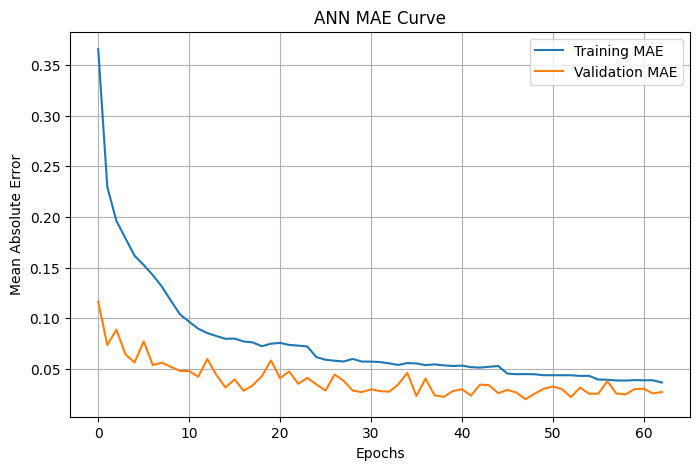

In [202]:
plt.figure(figsize=(8,5))
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("ANN MAE Curve")
plt.legend()
plt.grid(True)
plt.savefig("../../documentation/mae_curve.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

In [203]:
#Build ANN Model (TensorFlow)
# model = Sequential([
#     Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
#     Dense(32, activation="relu"),
#     Dense(1, activation="linear")
# ])

# model.compile(
#     optimizer=Adam(learning_rate=0.001),
#     loss="mse",
#     metrics=["mae"]
# )

# model.summary()

In [204]:
#Train the Model
# early_stop = EarlyStopping(
#     monitor="val_loss",
#     patience=10,
#     restore_best_weights=True
# )

# history = model.fit(
#     X_train_scaled,
#     y_train,
#     validation_data=(X_test_scaled, y_test),
#     epochs=100,
#     batch_size=32,
#     callbacks=[early_stop],
#     verbose=1
# )

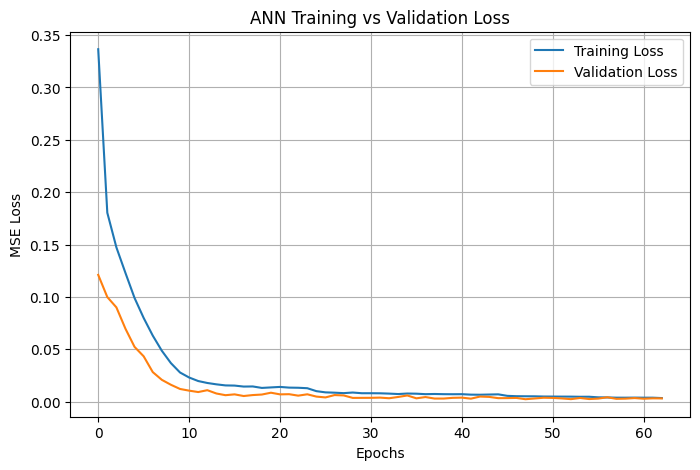

In [205]:
# Training & Validation Loss Curve
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("ANN Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.savefig("../../documentation/training_curve.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

In [206]:
# Save Trained ANN Model
MODEL_PATH = "code/models/currentAiSolution.h5"
model.save(MODEL_PATH)
print("Model saved.")


Model saved.


/Users/shashankkalaskar/miniconda3/envs/tf215/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [207]:
metrics_df = pd.DataFrame({
    "RMSE": [rmse],
    "R2": [r2],
    "Final_Train_Loss": [history.history["loss"][-1]],
    "Final_Val_Loss": [history.history["val_loss"][-1]]
})

metrics_df.to_csv("ann_metrics.csv", index=False)


In [208]:
# =========================
# Activation / Inference on New Market Data
# =========================

ACTIVATION_PATH = "../../data/activation_data.csv"
activation_df = pd.read_csv(ACTIVATION_PATH)

# Rebuild date features exactly like training
activation_df["Date"] = pd.to_datetime(activation_df["Date"])
activation_df["Year"]  = activation_df["Date"].dt.year
activation_df["Month"] = activation_df["Date"].dt.month
activation_df["Day"]   = activation_df["Date"].dt.day

# Build feature matrix exactly like training
X_activation = activation_df.drop(columns=["Date", "Close_Price"], errors="ignore")

# Align columns
X_activation = X_activation.reindex(columns=X_train.columns, fill_value=0)

# Scale activation features
X_activation_scaled = x_scaler.transform(X_activation)

# Predict in scaled space
y_activation_pred_scaled = model.predict(X_activation_scaled)

# Inverse-scale to real price
y_activation_pred = y_scaler.inverse_transform(y_activation_pred_scaled).flatten()

# Attach to dataframe
activation_df["Predicted_Close_Price"] = y_activation_pred

activation_df[["Close_Price", "Predicted_Close_Price"]].head()


1/1 [==============================] - 0s 11ms/step


,Close_Price,Predicted_Close_Price
0,11.62,12.329448


In [209]:
import os

os.makedirs("code/models", exist_ok=True)


import joblib

joblib.dump(scaler, "code/models/scaler.pkl")
print("Scaler saved to code/models/scaler.pkl")



Scaler saved to code/models/scaler.pkl
